In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import gc

In [2]:
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
ranking = pd.read_csv('ranking.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
gc.collect()

23

In [4]:
games.sample(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
21753,2016-12-09,21600340,Final,1610612749,1610612737,2016,1610612749,110.0,0.468,0.714,...,26.0,43.0,1610612737,114.0,0.476,0.759,0.353,32.0,46.0,0
2160,2020-01-10,21900572,Final,1610612742,1610612747,2019,1610612742,114.0,0.406,0.676,...,19.0,47.0,1610612747,129.0,0.528,0.781,0.417,18.0,49.0,0
5665,2012-03-21,21100688,Final,1610612740,1610612744,2011,1610612740,92.0,0.494,0.786,...,31.0,47.0,1610612744,101.0,0.438,0.900,0.483,27.0,33.0,0
18302,2019-03-16,21801040,Final,1610612743,1610612754,2018,1610612743,102.0,0.476,0.650,...,27.0,39.0,1610612754,100.0,0.453,0.703,0.250,20.0,41.0,1
17321,2003-11-29,20300228,Final,1610612742,1610612750,2003,1610612742,92.0,0.343,0.667,...,13.0,60.0,1610612750,88.0,0.442,0.750,0.188,22.0,52.0,1


In [5]:
games_details.sample(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
163311,20600024,1610612763,MEM,Memphis,200768,Kyle Lowry,NaN,NaN,NaN,18:02,...,3.0,1.0,4.0,4.0,0.0,0.0,2.0,4.0,0.0,16.0
454836,21600809,1610612749,MIL,Milwaukee,202328,Greg Monroe,NaN,NaN,NaN,26:19,...,1.0,7.0,8.0,4.0,2.0,2.0,2.0,3.0,17.0,21.0
541975,21400304,1610612743,DEN,Denver,201163,Wilson Chandler,NaN,F,NaN,46:57,...,0.0,6.0,6.0,3.0,3.0,0.0,1.0,3.0,18.0,4.0
177365,20500871,1610612759,SAS,San Antonio,699,Brent Barry,NaN,NaN,NaN,26:51,...,0.0,6.0,6.0,4.0,0.0,1.0,0.0,0.0,10.0,26.0
296505,21001158,1610612745,HOU,Houston,2755,Kevin Martin,NaN,G,NaN,39:46,...,0.0,4.0,4.0,2.0,1.0,0.0,4.0,1.0,30.0,-1.0


In [6]:
players.sample(5)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
3732,Luol Deng,1610612748,2736,2014
867,Duncan Robinson,1610612748,1629130,2018
5196,Tornike Shengelia,1610612751,203129,2012
6501,Orien Greene,1610612751,101158,2010
5035,John Salmons,1610612758,2422,2012


In [7]:
ranking.sample(2)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
156341,1610612766,0,22005,2006-02-28,East,Charlotte,58,15,43,0.259,10-18,5-25,NaN
108919,1610612742,0,12014,2014-10-25,West,Dallas,8,4,4,0.500,2-2,2-2,NaN


In [8]:
teams.sample(2)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
21,0,1610612760,1967,2019,OKC,Thunder,1967,Oklahoma City,Chesapeake Energy Arena,19163.0,Clay Bennett,Sam Presti,Billy Donovan,Oklahoma City Blue


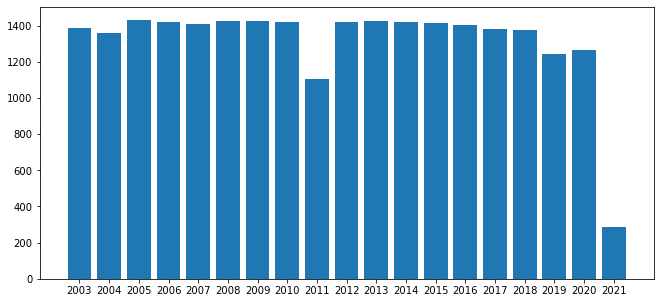

In [9]:
#season distribution 
fig, ax = plt.subplots(figsize=(11,5))

v_c = games['SEASON'].value_counts().sort_index()
v_c.index = v_c.index.astype(str)
ax.bar(v_c.index, v_c.values)

plt.show()
#2011 represents CBA lockout season

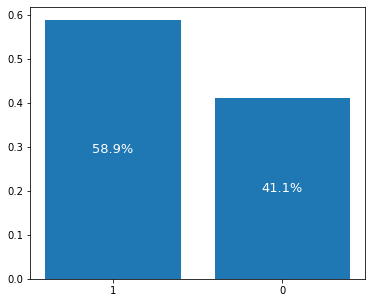

In [10]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games['HOME_TEAM_WINS'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%' 

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

In [11]:
def format_record(record):
    w = int(record[0])
    l = int(record[1])
    n = w+l
    
    if n == 0:
        return np.NaN
    
    return w / n

def format_rankings(ranking):
    
    home_record = ranking.loc[:,'HOME_RECORD'].str.split('-').apply(format_record)
    road_record = ranking.loc[:,'ROAD_RECORD'].str.split('-').apply(format_record)
    
    ranking.loc[:,'HOME_RECORD'] = home_record
    ranking.loc[:,'ROAD_RECORD'] = road_record
    
    ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:]
    
    return ranking



ranking = pd.read_csv('ranking.csv')
ranking = format_rankings(ranking)

In [12]:
games.sample(5)[['GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]

,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
2505,2014-04-23,1610612759,1610612742,92.0,113.0,0
20726,2017-10-12,1610612746,1610612758,104.0,87.0,1
15566,2005-02-01,1610612743,1610612752,96.0,76.0,1
7537,2010-11-16,1610612739,1610612755,101.0,93.0,1
19478,2018-04-15,1610612739,1610612754,80.0,98.0,0


In [13]:
ranking = ranking.sort_values(by='STANDINGSDATE')

In [14]:
def get_team_ranking_before_date(team_id, date, min_games=10):
    """Returned a dataframe with the team id, 
    Number of games played, win percentage, home and road record for
    current and previous season.
    
    Current and previous season are based on the date    
    """
    
    _ranking = ranking.loc[ranking['STANDINGSDATE'] < date]
    _ranking = _ranking.loc[_ranking['TEAM_ID'] == team_id]
    
    if _ranking.tail(1)['G'].values[0] < min_games:
        _ranking = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    
    _prev_season = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    _prev_season = _prev_season.loc[_prev_season['STANDINGSDATE'] == _prev_season['STANDINGSDATE'].max()]
    
    _current_season = _ranking[_ranking['STANDINGSDATE'] == _ranking['STANDINGSDATE'].max()]
    
    _current_season = _current_season[['TEAM_ID','G','W_PCT','HOME_RECORD','ROAD_RECORD']]
    _prev_season = _prev_season[['TEAM_ID','W_PCT','HOME_RECORD','ROAD_RECORD']]
    
    return _current_season.merge(_prev_season, on='TEAM_ID', suffixes=('','_prev')).drop(columns='TEAM_ID')


def get_team_ranking_before_game(games):
    _games = games.copy()
    
    def _get_ranking(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_rank = get_team_ranking_before_date(home_team, date)
        a_rank = get_team_ranking_before_date(away_team, date)
        
        h_rank.columns += '_home'
        a_rank.columns += '_away'
        
        return pd.concat([h_rank, a_rank], axis=1)
    
        
    _games = _games.groupby('GAME_ID').apply(_get_ranking)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)


In [15]:
%%time

_games = games.sample(10)
get_team_ranking_before_game(_games)


CPU times: user 595 ms, sys: 67.1 ms, total: 662 ms
Wall time: 678 ms


,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,ROAD_RECORD_away,W_PCT_prev_away,HOME_RECORD_prev_away,ROAD_RECORD_prev_away
0,11500109,82,0.671,0.804878,0.536585,0.756,0.780488,0.731707,82,0.683,0.731707,0.634146,0.659,0.804878,0.512195
1,20300553,37,0.514,0.687500,0.380952,0.341,0.487805,0.195122,38,0.316,0.333333,0.294118,0.366,0.658537,0.073171
2,20600925,61,0.770,0.800000,0.741935,0.659,0.756098,0.560976,61,0.459,0.612903,0.300000,0.463,0.585366,0.341463
3,20601122,76,0.395,0.500000,0.289474,0.317,0.414634,0.219512,74,0.432,0.552632,0.305556,0.500,0.658537,0.341463
4,21000937,60,0.633,0.700000,0.566667,0.610,0.658537,0.560976,60,0.533,0.566667,0.500000,0.659,0.780488,0.536585
5,21400719,48,0.646,0.720000,0.565217,0.537,0.536585,0.536585,47,0.426,0.480000,0.363636,0.524,0.609756,0.439024
6,21500613,40,0.375,0.368421,0.380952,0.366,0.463415,0.268293,40,0.550,0.684211,0.428571,0.463,0.560976,0.365854
7,21501177,78,0.885,0.948718,0.820513,0.817,0.951220,0.682927,77,0.844,1.000000,0.684211,0.671,0.804878,0.536585
8,21600925,60,0.783,0.769231,0.794118,0.817,0.975610,0.658537,61,0.410,0.454545,0.357143,0.354,0.341463,0.365854
9,22000946,63,0.302,0.366667,0.242424,0.297,0.250000,0.343750,62,0.500,0.633333,0.375000,0.231,0.235294,0.225806


In [16]:
games = games.sort_values(by='GAME_DATE_EST')

In [17]:
def get_games_stats_before_date(team_id, date, n, stats_cols, game_type='all'):
    """
    """
    
    if game_type not in ['all','home','away']:
        raise ValueError('game_type must be all, home or away')
    
    _games = games.loc[games['GAME_DATE_EST'] < date]
    _games = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]
    
    _games.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
    
    if game_type == 'home':
        _games = _games.loc[_games['is_home']]
        
    elif game_type == 'away':
        _games = _games.loc[~_games['is_home']]
        
    _games.loc[:,'WIN_PRCT'] = _games['is_home'] == _games['HOME_TEAM_WINS']
    
    for col in stats_cols:
        _games.loc[:,col] = np.where(_games['is_home'], _games['%s_home'%col], _games['%s_away'%col])
    
    cols = ['WIN_PRCT'] + stats_cols
    
    if len(_games) < n:
        return _games[cols]
    
    return _games.tail(n)[cols]



STATS_COLUMNS = ['PTS','FG_PCT','FT_PCT','FG3_PCT','AST','REB']
# STATS_COLUMNS = ['PTS']

def get_games_stats_before_game(games, n, stats_cols=STATS_COLUMNS):
    _games = games.copy()
    
    def _get_stats(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_stats = get_games_stats_before_date(home_team, date, n, stats_cols, game_type='all')
        h_stats.columns += '_home_%ig'%n
        h_stats = h_stats.mean().to_frame().T
        
        a_stats = get_games_stats_before_date(away_team, date, n, stats_cols, game_type='all')
        a_stats.columns += '_away_%ig'%n
        a_stats = a_stats.mean().to_frame().T
        
        return pd.concat([h_stats, a_stats], axis=1)
        
        
    _games = _games.groupby('GAME_ID').apply(_get_stats)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

In [18]:
%%time

_games = games.sample(10, random_state=42)
get_games_stats_before_game(_games, n=2)

CPU times: user 208 ms, sys: 11.4 ms, total: 219 ms
Wall time: 221 ms


,GAME_ID,WIN_PRCT_home_2g,PTS_home_2g,FG_PCT_home_2g,FT_PCT_home_2g,FG3_PCT_home_2g,AST_home_2g,REB_home_2g,WIN_PRCT_away_2g,PTS_away_2g,FG_PCT_away_2g,FT_PCT_away_2g,FG3_PCT_away_2g,AST_away_2g,REB_away_2g
0,20300976,0.0,106.0,0.4850,0.7215,0.2655,20.0,42.5,0.5,89.0,0.4390,0.7000,0.3415,20.5,39.0
1,20400725,1.0,111.0,0.4410,0.7550,0.5140,26.0,45.5,0.5,102.0,0.4495,0.6930,0.4135,16.0,51.0
2,20800122,0.5,97.5,0.4575,0.8025,0.4155,16.0,33.0,0.5,88.0,0.4000,0.7610,0.3660,13.0,38.5
3,20800356,1.0,99.0,0.4780,0.8190,0.3750,24.5,38.0,1.0,119.5,0.5065,0.6795,0.3470,27.5,45.5
4,21100164,0.5,88.5,0.4065,0.7915,0.2480,18.5,52.5,0.5,91.5,0.3825,0.7655,0.2515,14.5,45.5
5,21300721,1.0,122.5,0.4865,0.8135,0.4455,33.0,47.0,1.0,97.5,0.4235,0.8445,0.2600,19.0,49.0
6,21300748,0.0,113.5,0.4650,0.7365,0.2830,28.5,44.5,0.5,97.5,0.4345,0.8335,0.3430,23.0,44.0
7,21400794,0.0,84.0,0.3950,0.7105,0.4130,18.0,39.0,0.5,98.0,0.4245,0.9400,0.3745,21.5,45.0
8,22000034,0.5,105.5,0.4610,0.6440,0.3690,24.0,43.0,1.0,119.0,0.4700,0.6880,0.4120,36.0,53.0
9,41600235,0.5,103.5,0.4735,0.6500,0.3320,23.0,46.0,0.5,108.5,0.4450,0.7445,0.3750,22.5,40.0


In [19]:
one_game = games.sample(1, random_state=42)
one_game[['GAME_ID','GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]


,GAME_ID,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
24126,21400794,2015-02-11,1610612740,1610612754,93.0,106.0,0


In [20]:
date = '2013-04-01'
game_id = 21201104
h_team = 1610612745
a_team = 1610612753

In [21]:
_games = games[games['GAME_DATE_EST'] < date].sort_values(by='GAME_DATE_EST')
    
for team_id in [h_team, a_team]:
    print(team_id)
    _games2 = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]

    # Check on PTS and AST
    _games2 = _games2[['GAME_DATE_EST','TEAM_ID_home','PTS_home','REB_home','TEAM_ID_away','PTS_away','REB_away']]

    # define n = 5
    display(_games2.tail(5))

1610612745


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
4146,2013-03-22,1610612745,116.0,54.0,1610612739,78.0,32.0
4127,2013-03-24,1610612745,96.0,44.0,1610612759,95.0,38.0
4109,2013-03-27,1610612745,91.0,42.0,1610612754,100.0,45.0
4093,2013-03-29,1610612763,103.0,42.0,1610612745,94.0,35.0
4081,2013-03-30,1610612745,98.0,48.0,1610612746,81.0,38.0


1610612753


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
4141,2013-03-22,1610612753,89.0,44.0,1610612760,97.0,49.0
4120,2013-03-25,1610612753,94.0,43.0,1610612748,108.0,44.0
4104,2013-03-27,1610612766,114.0,43.0,1610612753,108.0,34.0
4088,2013-03-29,1610612753,97.0,41.0,1610612764,92.0,55.0
4079,2013-03-30,1610612737,97.0,44.0,1610612753,88.0,53.0


In [22]:
res = get_games_stats_before_game(one_game, n=5, stats_cols=['PTS','REB'])
res

,GAME_ID,WIN_PRCT_home_5g,PTS_home_5g,REB_home_5g,WIN_PRCT_away_5g,PTS_away_5g,REB_away_5g
0,21400794,0.4,98.0,44.8,0.6,101.4,41.6


In [30]:
h_pts = 116 + 96 + 91 + 94 + 98
a_pts = 89 + 94 + 108 + 97 + 88

h_reb = 54 + 44 + 42 + 35 + 48
a_reb = 44 + 43 + 34 + 41 + 53

h_pts = h_pts / 5
h_reb = h_reb / 5

a_pts = a_pts / 5
a_reb = a_reb / 5

print(h_pts, h_reb, a_pts, a_reb)


assert h_pts == res['PTS_home_5g'].values[0]
assert h_reb == res['REB_home_5g'].values[0]
assert a_pts == res['PTS_away_5g'].values[0]
assert a_reb == res['REB_away_5g'].values[0]
assert False == True                                                                      
print('Function ok!')
raise 

99.0 44.6 95.2 43.0


AssertionError: 

In [ ]:
%%time 

def prepare_games_data(games):
    # Get ranking stats before game
    rank_stats = get_team_ranking_before_game(games)
    
    # Get stats before game 3 previous games
    game_stats_3g = get_games_stats_before_game(games, n=3)
    
    # Get stats before game 10 previous games
    game_stats_10g = get_games_stats_before_game(games, n=10)
    
    formated_games = rank_stats.merge(game_stats_3g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_10g, on='GAME_ID')
    
    return formated_games
    
    
_games = games.sample(10, random_state=42)
prepare_games_data(_games)

In [ ]:
_games = games[games['SEASON'] >= 2007]


In [ ]:
_games['SEASON'].unique()

In [ ]:
%%time
games_formated = prepare_games_data(_games)

In [ ]:
games_formated = games_formated.merge(games[['GAME_ID','GAME_DATE_EST','SEASON','HOME_TEAM_WINS']], on='GAME_ID', how='left')
games_formated = games_formated.reset_index(drop=True)

In [ ]:
# games_formated = games_formated.drop(columns=['GAME_DATE_EST_y','GAME_DATE_EST_x'])
games_formated.head()

In [ ]:
games_formated.info()

In [ ]:
games_formated.isna().sum().sum()

In [ ]:
games_formated.to_csv('games_formated_07_20.csv', index=False)

In [ ]:
feat_cols = [
    'G_home', 'W_PCT_home', 'HOME_RECORD_home',
    'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
    'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
    'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
    'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
    'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
    'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
    'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
    'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
    'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
    'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g'
]
target = 'HOME_TEAM_WINS'

In [ ]:
corr = games_formated[feat_cols + [target]].corr()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
feat_cols = corr[corr[target].sort_values().abs() >= 0.1].index
feat_cols = [c for c in feat_cols if c != target]
feat_cols

In [ ]:
#Training set : 2007-2018 seasons data
train = games_formated.loc[(games_formated['SEASON'] >= 2007) & (games_formated['SEASON'] <= 2018)]

In [ ]:
train.shape

In [ ]:
train['HOME_TEAM_WINS'].value_counts(normalize=True)

In [ ]:
X_train, y_train = train[feat_cols], train[target]


In [ ]:
test = games_formated.loc[(games_formated['SEASON'] == 2019)]

In [ ]:
test.shape

In [ ]:
test['HOME_TEAM_WINS'].value_counts(normalize=True)

In [ ]:
X_test, y_test = test[feat_cols], test[target]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope


def map_best_param(best_param, param_space):
    """Maps the parameters set by using hyperopt with
    real value (which can be used to instantiate the model)

    This function is mainly for param set with hp.choice or
    if it's an integer

    Parameters
    ----------
    best_param : dict
        Dictionnary with the best selected value
        for each parameters 
    param_space : dict
        Dictionnary with the proba distribution for
        each parameters

    Returns
    -------
    dict
        Dictionnary with the best parameters in the
        correct format to instanciate the model
    """
    for key, value in param_space.items():
        best_val = best_param[key]
        
        if value.name == 'switch':
            _values = value.pos_args[1:]    
            best_val = _values[best_val].obj
            
        elif value.name == 'int':
            best_val = int(best_val)
        
        best_param[key] = best_val
        
    return best_param


class BayesianSearchCV():
    """Find best parameters from a given param_space using
    Bayesian optimization (package hyperopt)

    For the scoring method : 
    https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

    Parameters
    ----------
    model :
        Model class (not instantiate)
    param_space : dict
        Dictionnary with the proba distribution for
        each parameters
    X_train : array-like 
        Feature to train the model
    y_train : array-like
        Label to train the model
    n_iter : int
        Number of maximum iteration
    cv : int, optional
        Determines the cross-validation splitting strategy, by default 5
    scoring : str, callable, list/tuple or dict, default=None
        A single str or a callable to evaluate the predictions on the test set.
        For evaluating multiple metrics, either give a list of (unique) strings
        or a dict with names as keys and callables as values.
        If None, the estimator's score method is used.
    maximize_score : bool, optional
        Whether you want to maximize the score (e.g. accuracy)
        or to minimize it (e.g. RMSE), by default True

    Returns
    -------
    best_model
        The model fitted with the best hyperparameters
    """
    
    def __init__(self, estimator, param_space, n_iter, cv=5, scoring=None, maximize_score=True, n_jobs=None):
        """
        """
        self.estimator = estimator
        self.param_space = param_space
        self.n_iter = n_iter
        self.cv = cv
        self.scoring = scoring
        self.maximize_score = maximize_score
        self.n_jobs = n_jobs
        
        
    
    def fit(self, X, y):
        """
        X : array-like of shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and n_features is the number of features.
        y : array-like of shape (n_samples, n_output) or (n_samples,)
        """        
    
        def objective_function(params):
            """Objective function to maximize.

            /!\ if your metric needs to be minimize please 
            /!\ use maximize_score=False

            Parameters
            ----------
            params: dict
                Dictionnary of parameters for
                the model

            Returns
            -------
            dict:
                dictionnary with loss and status
            """
            model = self.estimator(**params)
            score = cross_val_score(model, X, y, cv=self.cv, scoring=self.scoring, n_jobs=self.n_jobs).mean()
            loss = -score if self.maximize_score else score
            
            return {'loss': loss, 'status': STATUS_OK}
        
    
        # Init history
        trials = Trials()
        best_param = fmin(objective_function, 
                          self.param_space, 
                          algo=tpe.suggest, 
                          max_evals=self.n_iter, 
                          trials=trials,
                          rstate= np.random.RandomState(1))


        # Map best parameters
        best_param = map_best_param(best_param, self.param_space)
        if self.n_jobs is not None:
            best_param['n_jobs'] = self.n_jobs
        
        # Fit the best model
        best_estimator = self.estimator(**best_param)
        best_estimator.fit(X, y)
        
        self.best_estimator_ = best_estimator
        self.best_param_ = best_param
        self.best_score_ = cross_val_score(best_estimator, X, y, 
                                           cv=self.cv, 
                                           scoring=self.scoring,
                                           n_jobs=self.n_jobs).mean()
        self.trials_ = trials

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

In [ ]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

In [ ]:
lr = LogisticRegression(random_state=42, penalty='l2')
lr.fit(X_train, y_train)

In [ ]:
print('Train accuracy:',lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

In [ ]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 4, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 2000, 1))
}

n_iter =  50
clf = RandomForestClassifier

# bayes_search = BayesianSearchCV(clf, param_hyperopt, n_iter, cv=5, scoring='accuracy', maximize_score=True, n_jobs=2)
# bayes_search.fit(X_train, y_train)

# bayes_search.best_estimator_

In [ ]:
bayes_search.best_estimator_.score(X_test, y_test)

In [ ]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'C': scope.int(hp.quniform('C', 1, 10, 1)),
    'penalty': hp.choice('penalty', ['l1','l2','elasticnet']),
    'solver' :hp.choice('solver', ['newton-cg','lbfgs','liblinear','sag','saga']),
}

n_iter =  50
lr = LogisticRegression

bayes_search = BayesianSearchCV(lr, param_hyperopt, n_iter, cv=5, scoring='accuracy', maximize_score=True, n_jobs=2)
bayes_search.fit(X_train, y_train)

bayes_search.best_estimator_

In [ ]:
from sklearn.metrics import plot_confusion_matrix

print(bayes_search.best_estimator_.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(9,8))
plot_confusion_matrix(bayes_search.best_estimator_, X_test, y_test, ax=ax)  
plt.show()